In [1]:
from rustyspikes import *

In [2]:
prob = .15
input_size = 10
model_size = 100
aw_step = 4
rt=10
scale = 3

def generate_big_model(prob, input_size, model_size, aw_step, rt, scale, noise_ranges=(.1, 1), delay_ranges=(10, 15)):
    snn = SNNModel()
    id = 0
    for i in range(input_size):
        snn.add_neuron(Spikes_at_will(awaiting_time=i*aw_step, rt=rt, id=id))
        id+=1
    for i in range(model_size):
        snn.add_neuron(Izhikevich(noise=np.random.uniform(*noise_ranges), id=id))
        id += 1
    for i in range(model_size):
        for j in range(input_size+model_size):
            if random.randrange(input_size, model_size) < (input_size + model_size) * prob:
                print(np.random.uniform(*delay_ranges))
                snn.add_synapse(Delayed_synapse(snn[j], snn[i+input_size], delay=int(np.random.uniform(*delay_ranges)), scale=scale, synaptic_limit=1, w=1, max_delay=100, b=7.4))
    snn.reload_graph()
    return snn
        


In [3]:
network = generate_big_model(prob, input_size, model_size, aw_step, rt, scale, noise_ranges=(.1, 1), delay_ranges=(10, 15))
network.show_config()

12.353092835143558
13.568504311738819
10.019597922445744
13.23753454258769
10.602726327820834
12.334097322316154
13.482752190298298
10.209993346719179
10.358857390771954
14.467802144854295
10.775671300844092
11.34488639442225
12.088684392023854
10.510856935217337
11.855526099075357
14.131676377694998
13.123076402257652
13.124985621651323
11.543040274557983
13.362323726849647
13.91862303907891
10.37980164025621
14.933044785838378
10.557189161157392
14.109526037664974
12.259394407071023
11.868318563058178
13.426295180301308
10.729228269953401
11.358617713799923
14.517130157392991
13.829663418494489
13.178013013479692
13.879573551564505
10.10128904949609
12.874043540029872
10.262789788913299
13.37944232173442
11.595851009456705
11.240615215156136
14.638159819398957
14.797992437942805
11.554543210162114
14.445805553857465
12.105948845909317
14.555405732026284
11.198779109196233
12.137007400332658
11.650891458537266
10.674633393818922
13.11725684425804
13.390455810759443
10.135774237998081


{'Neurons': {0: <neurons.Spikes_at_will at 0x29db2969850>,
  1: <neurons.Spikes_at_will at 0x29db0699350>,
  2: <neurons.Spikes_at_will at 0x29db2969c90>,
  3: <neurons.Spikes_at_will at 0x29db29690d0>,
  4: <neurons.Spikes_at_will at 0x29db2969dd0>,
  5: <neurons.Spikes_at_will at 0x29db2968a50>,
  6: <neurons.Spikes_at_will at 0x29db2968350>,
  7: <neurons.Spikes_at_will at 0x29db296a9d0>,
  8: <neurons.Spikes_at_will at 0x29db296b150>,
  9: <neurons.Spikes_at_will at 0x29db0963710>,
  10: <neurons.Izhikevich at 0x29db294d810>,
  11: <neurons.Izhikevich at 0x29db27955d0>,
  12: <neurons.Izhikevich at 0x29db294d750>,
  13: <neurons.Izhikevich at 0x29db294e2d0>,
  14: <neurons.Izhikevich at 0x29db294f510>,
  15: <neurons.Izhikevich at 0x29db294f250>,
  16: <neurons.Izhikevich at 0x29db294fc90>,
  17: <neurons.Izhikevich at 0x29db294fdd0>,
  18: <neurons.Izhikevich at 0x29db294fa10>,
  19: <neurons.Izhikevich at 0x29d91264490>,
  20: <neurons.Izhikevich at 0x29d91258390>,
  21: <neurons

In [4]:
from pyvis.network import Network
#network.spit_for_pyvis().show()

In [5]:
graph = network.spit_for_pyvis()
pos = nx.circular_layout(graph, scale=1000)
net = Network(height="950px", width="100%", bgcolor="#222222", font_color="white", directed=True, notebook=True)
net.from_nx(graph)
for node in net.get_nodes():
    net.get_node(node)['x']=pos[node][0]
    net.get_node(node)['y']=-pos[node][1] #the minus is needed here to respect networkx y-axis convention 
    net.get_node(node)['physics']=False
    net.get_node(node)['label']=str(node) #set the node label as a string so that it can be displayed
net.toggle_physics(False)
net.show('big.html')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
big.html


In [6]:
TIME = 1000
gatherer = Gatherer(network)
for i in range(int(TIME/.1)):
    gatherer.gather_spikes_only()
    network.tick()

IndexError: list index out of range

In [ ]:
data = np.array(gatherer.spikes)
print(data.shape)
timings = []
for i in range(data.shape[0]):
    timings.append(np.where(data[i]))
timings

(110, 10000)


[(array([   1, 3002, 6003, 9004], dtype=int64),),
 (array([  40, 3041, 6042, 9043], dtype=int64),),
 (array([  81, 3082, 6083, 9084], dtype=int64),),
 (array([ 121, 3122, 6123, 9124], dtype=int64),),
 (array([ 161, 3162, 6163, 9164], dtype=int64),),
 (array([ 200, 3201, 6202, 9203], dtype=int64),),
 (array([ 240, 3241, 6242, 9243], dtype=int64),),
 (array([ 280, 3281, 6282, 9283], dtype=int64),),
 (array([ 320, 3321, 6322, 9323], dtype=int64),),
 (array([ 360, 3361, 6362, 9363], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64)

In [ ]:
def draw_raster(data, step, fwidth=16, fheight=12, dpi=100):
    plt.figure()
    plt.eventplot(data)
    plt.show()

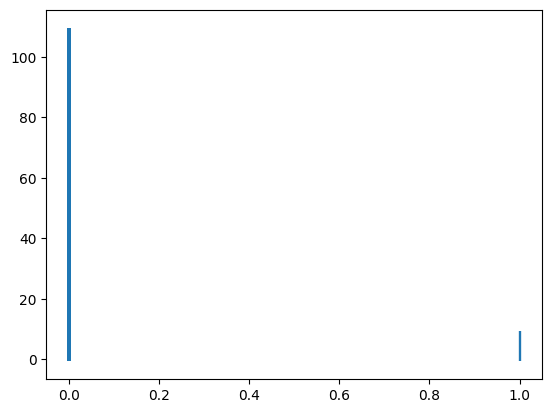

In [ ]:
draw_raster(data, step=.1)